In [1]:
from functions import *
import numpy as np
import pandas as pd
from functions import *
from questions import *
from visualization import *
from models import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#From here and on, our script starts executing
dataframe1, dataframe2 = read_files()

In [4]:
#do a minor edit in df1 so as to have all split product codes saved as a set
dataframe1, dataframe2 = edit_dfs(dataframe1, dataframe2)

c:\Users\steve\Clio Muse Data Analysis Project\Clio_Muse-Data-Analysis-Project-1\functions.py:308: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataframe1['booking_date'] = pd.to_datetime(dataframe1['booking_date'], dayfirst=True)


Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Unnamed: 0', 'Reviews', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories'],
      dtype='object')


In [5]:
#add profit to dataframe2
dataframe2 = add_df2_profit(dataframe1, dataframe2)

In [6]:
#which tours go together?
go_together = which_tours_go_together(dataframe1, dataframe2)

In [7]:
#how does a successful tour look like?
successful = successful_tour_looks_like(dataframe1, dataframe2)

In [29]:
#which tours do we recommend to a traveller?
which_tours_do_we_recommend_to_a_traveller(dataframe1, dataframe2, go_together)

In [9]:
save_to_excel(dataframe1, dataframe2)

In [10]:
from IPython.display import display
display(dataframe1.head(5))

,id,reference_code,travel_date,booking_date,booking_status,split_product_code,language,tours,product_title,product_type,...,Ticket Price,Profit,split_product_codes,booking_day,booking_hour,travel_day,travel_day_number,travel_month,number_of_stories,money_spent_per_traveller
0,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Au...,Skip-the-Line,...,34.0,24.0,"{288DE, STL284}",Tuesday,23,Thursday,travel_date,1,2,29.0
1,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Au...,Skip-the-Line,...,34.0,24.0,"{STL284, 288EN}",Tuesday,23,Thursday,travel_date,1,2,29.0
2,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Au...,Skip-the-Line,...,34.0,24.0,"{STL284, 288IT}",Tuesday,23,Thursday,travel_date,1,2,29.0
3,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Au...,Skip-the-Line,...,29.0,29.0,{STL284DE},Tuesday,23,Thursday,travel_date,1,1,29.0
4,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Au...,Skip-the-Line,...,29.0,29.0,{STL284EN},Tuesday,23,Thursday,travel_date,1,1,29.0


In [11]:
dataframe2.head(5)

,Practical Information,Product Code and Name,Unnamed: 2,Qualitative Information - Findings,Unnamed: 4,Unnamed: 5,Experience,month,Product Code,Name of Product,split_product_code,Country,language,split_product_codes,Standardized_Experience,number_of_stories,Profit
0,Important Information,Name of Product Reviewed,Review,Content,Technology,Customer Support,Overall Experience,January,Name of Product Reviewed,None,Name of Product Reviewed,NaN,NaN,{Name of Product Reviewed},NaN,1,NaN
1,False,STL55 | Athens National Archaeological Museum ...,Without the Audio Guide I would not have under...,NaN,NaN,NaN,Excellent (5 stars),January,STL55,Athens National Archaeological Museum Ticket ...,STL55,NaN,NaN,{STL55},5,1,NaN
2,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,English,"{459, 181, TO240, 51}",4,4,NaN
8,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Spanish,"{459, 181, TO240, 51}",4,4,NaN
60,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Italian,"{459, 181, TO240, 51}",4,4,NaN


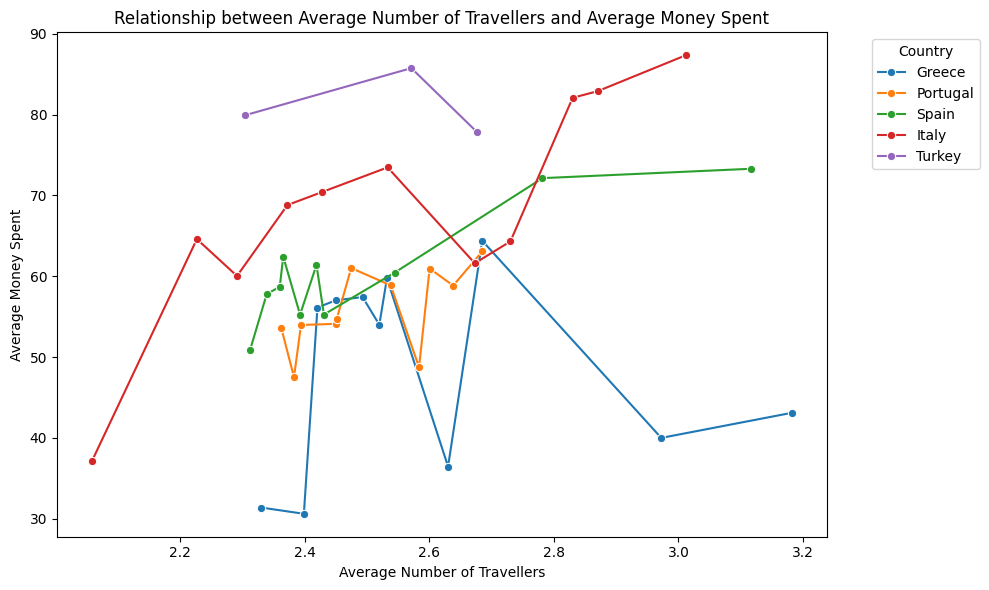

In [12]:
travellers_vs_spending(dataframe1)


Note: The average number of travellers per country changes depending on the month.

c:\Users\steve\Clio Muse Data Analysis Project\Clio_Muse-Data-Analysis-Project-1\visualization.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Stories', y='Average Profit', data=df1, palette='coolwarm', width=0.5)
c:\Users\steve\Clio Muse Data Analysis Project\Clio_Muse-Data-Analysis-Project-1\visualization.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.show()


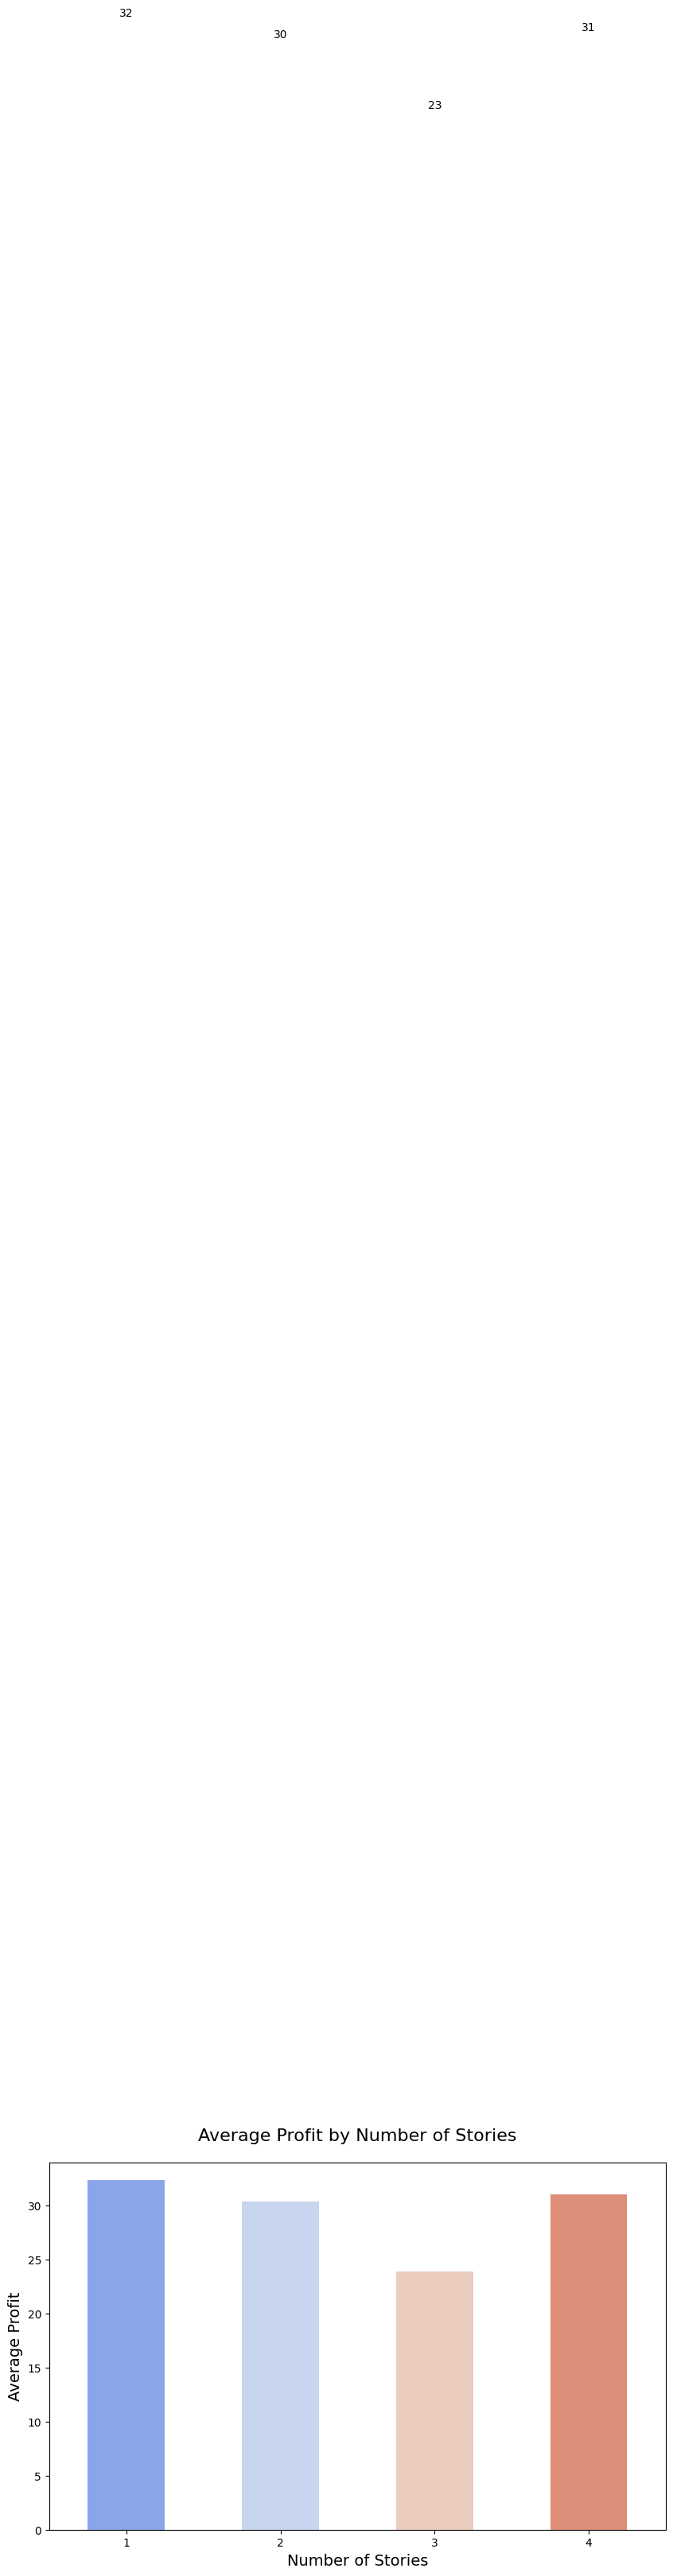

,Number of Stories,Average Profit
0,1,32.370355
1,2,30.379354
2,3,23.864771
3,4,31.030238


In [33]:
optimum_number_of_stories_profit(dataframe1)

c:\Users\steve\Clio Muse Data Analysis Project\Clio_Muse-Data-Analysis-Project-1\visualization.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Standardized_Experience', y='Most_Common_Number_of_Stories', data=df, palette='rocket')


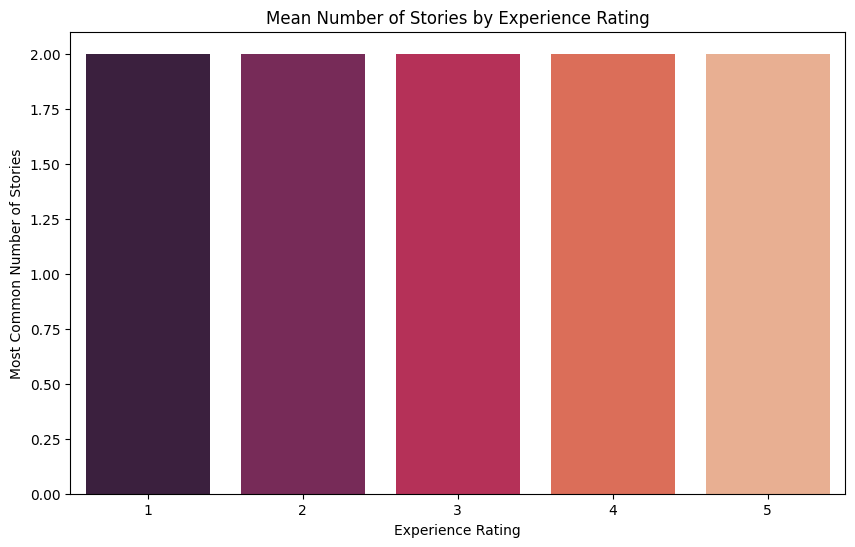

c:\Users\steve\Clio Muse Data Analysis Project\Clio_Muse-Data-Analysis-Project-1\visualization.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Standardized_Experience', y='Most_Common_Number_of_Stories', data=df, palette='rocket')


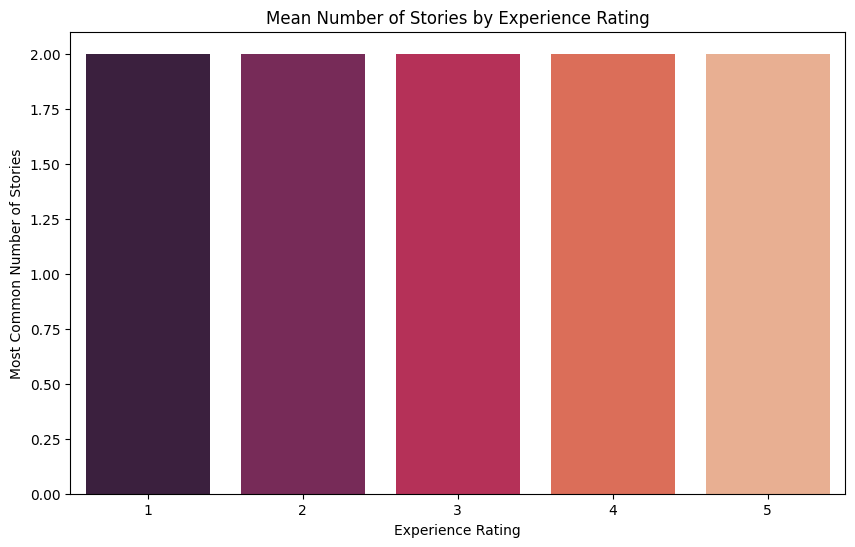

In [20]:
optimum_number_of_stories_liked(dataframe2)

We can see that the most common number of stories per booking is 2, regardless of user experience.
We can deduct that it is better to strive for 2 stories then.

In [22]:
dataframe1.columns

Index(['id', 'reference_code', 'travel_date', 'booking_date', 'booking_status',
       'split_product_code', 'language', 'tours', 'product_title',
       'product_type', 'product_country', 'seller_name', 'seller_id', 'month',
       'task_id', 'channel', 'num_of_travellers', 'retail_price', 'net_price',
       'product_code', 'stories', 'Country', 'Ticket Price', 'Profit',
       'split_product_codes', 'booking_day', 'booking_hour', 'travel_day',
       'travel_day_number', 'travel_month', 'number_of_stories',
       'money_spent_per_traveller'],
      dtype='object')

In [23]:
dataframe2.columns

Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories', 'Profit'],
      dtype='object')